In [54]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from math import sqrt as sqrt
import itertools
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.metrics import r2_score

In [59]:
data=pd.read_csv('./datasets/ceda/cld/cld5.csv',index_col='DATE',parse_dates=True)
future=pd.read_csv('./future.csv',index_col='DATE',parse_dates=True)

In [24]:
data['log']=np.log(data['CLOUD COVER'])

In [3]:
#Data Split
data.index.freq='M'
point=240
train=data.iloc[:-point]
test=data.iloc[-point:]

In [4]:
def pff(result, d, col):
  fig, ax = plt.subplots(figsize=(18, 6))
  ax.plot(data[col], label='Observed')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='Fitted')

  # forecast the test set
  prediction_result = result.get_forecast(point)
  #conf_int = prediction_result.conf_int()
  #lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='Forecast')
  #ax.fill_between(test.index, \
                  #lower, upper, \
                  #color='red', alpha=0.3)
  ax.legend(loc='upper left')

In [33]:
model = sm.tsa.statespace.SARIMAX(train['CLOUD COVER'], order=(12,1,12), seasonal_order=(0,0,0,0),
                enforce_stationarity=True,enforce_invertibility=False) # ARMA(12,0,3)
result01 = model.fit()

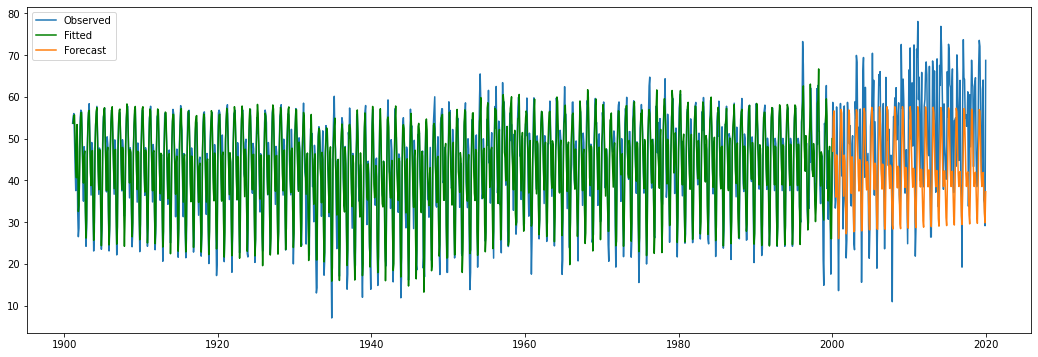

In [34]:
pff(result01,1,'CLOUD COVER')

In [5]:
def rmse(result, col, logflag):
  forecast = result.forecast(point)
  if logflag:
    forecast = np.exp(forecast)
  
  t = test[col]
  y = forecast
  return np.sqrt(np.mean((t - y)**2))

In [35]:
print(rmse(result01, 'CLOUD COVER',False))

12.648136160605029


In [14]:
result01.forecast(point)

2000-01-31    0.0
2000-02-29    0.0
2000-03-31    0.0
2000-04-30    0.0
2000-05-31    0.0
             ... 
2019-08-31    0.0
2019-09-30    0.0
2019-10-31    0.0
2019-11-30    0.0
2019-12-31    0.0
Freq: M, Name: predicted_mean, Length: 240, dtype: float64

In [33]:
p = range(1,13)
d = range(1,3)
q = range(1,13)
pdq = list(itertools.product(p, d, q))
print('ARIMA,','AIC,','RMSE')
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
'''for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['CLOUD COVER'],
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('{}x{},{},{}'.format(param,param_seasonal, results.aic,(rmse(results,'CLOUD COVER',False))))'''
for param in pdq:
    model = ARIMA(train['log'],
                  order=param,
                  enforce_stationarity=False,
                  enforce_invertibility=False)
    results = model.fit()
    print('{},{},{}'.format(param,results.aic,(rmse(results,'CLOUD COVER',True))))

ARIMA, AIC, RMSE
(1, 1, 1),412.73249949494704,21.655518893670322
(1, 1, 2),-14.536523260208298,15.99274626482903
(1, 1, 3),-77.00458237080122,15.984632190281815
(1, 1, 4),-114.02719013145199,16.130170923037063
(1, 1, 5),-334.8909924257291,18.89136334980454
(1, 1, 6),-320.3590148572284,16.304603934024055
(1, 1, 7),-343.805507198438,16.773276462497197
(1, 1, 8),-344.0351770124942,16.768556706799224
(1, 1, 9),-426.0363119562956,16.299943923857843
(1, 1, 10),-410.09214519333034,16.09745641488242
(1, 1, 11),-370.3278947097781,16.45501814944386
(1, 1, 12),-499.8123817767963,16.562572543240897
(1, 2, 1),488.9299795377852,19.46718197112998
(1, 2, 2),421.49711710738694,23.01517125345577
(1, 2, 3),25.368379610467542,46.67019810180427
(1, 2, 4),-58.30107654760883,14.298060501594888
(1, 2, 5),-58.7922186295463,16.989103255184382
(1, 2, 6),-305.2575779109072,16.31957036237558
(1, 2, 7),-222.8739322000646,16.08683093324733
(1, 2, 8),-307.5995941207642,19.645920098440925
(1, 2, 9),-223.64438622211938

(8, 1, 4),267.9564036830086,24.952327995678516
(8, 1, 5),-1385.183900432834,15.428013379030356
(8, 1, 6),-1450.841533470541,15.519049544704034
(8, 1, 7),-1401.0161061552371,15.277047175466025
(8, 1, 8),-1436.4629515837505,16.898955423735856
(8, 1, 9),-1787.9722449492108,13.44398581263813
(8, 1, 10),-1803.722586174364,12.97097628669619
(8, 1, 11),-1719.3425352964978,12.8681841169708
(8, 1, 12),-1847.277266161443,12.230932975304048
(8, 2, 1),232.06361398781036,49.741516846110265
(8, 2, 2),-627.2653562946796,26.443225830139074
(8, 2, 3),-266.0130249324832,24.409355632776542
(8, 2, 4),3865.69288896975,inf
(8, 2, 5),-51.62859333868985,50.31508675893264
(8, 2, 6),-403.38962406607266,43.558388151926515
(8, 2, 7),-599.9771712955517,40.27594316617704
(8, 2, 8),-932.6316918680197,15.09896329190633
(8, 2, 9),-1096.0101273351543,15.005661504849886
(8, 2, 10),-1314.221752658414,13.962267256958857
(8, 2, 11),-1667.5387489691545,17.315668794059132
(8, 2, 12),-1254.1458959890097,14.585445954643816
(9,

In [6]:
def pff_new(result, d, col):
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(test[col], label='Observed')
    # forecast the test set
    prediction_result = result.get_forecast(point)
    forecast = prediction_result.predicted_mean
    ax.plot(test.index, forecast, label='Forecast')
    ax.legend(loc='upper left')
    ax.set_xlabel('Time')
    ax.set_ylabel('Cloud Cover')
    #ax.set_xticks('DATE')

In [60]:
def pff_future(result, d, col):
    fig, ax = plt.subplots(figsize=(18, 6))
    #ax.plot(test[col], label='Observed')
    prediction_result = result.get_forecast(len(future))
    forecast = prediction_result.predicted_mean
    future[col]=forecast
    ax.plot(future.index, forecast, label='Forecast')
    ax.legend(loc='upper left')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')
    #ax.set_xticks('DATE')

In [44]:
model = ARIMA(train['CLOUD COVER'],order=(12,1,12),enforce_stationarity=False,enforce_invertibility=False)
#model2 = ARIMA(train['log'],order=(12,1,12),enforce_stationarity=False,enforce_invertibility=False)
result=model.fit()
#result2=model2.fit()

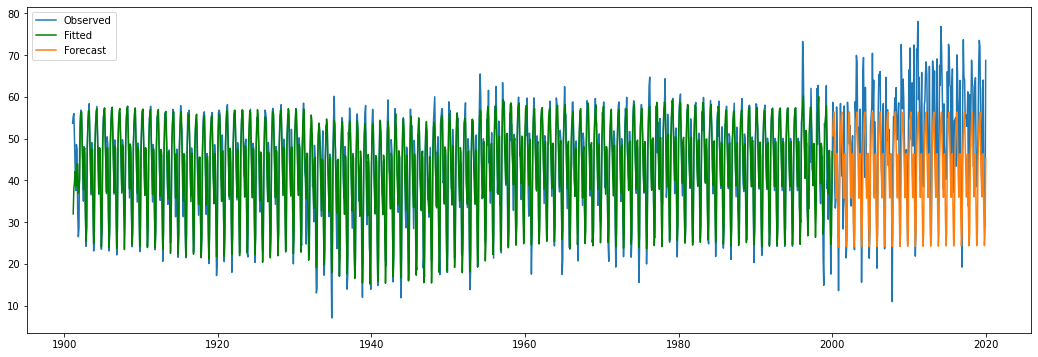

In [45]:
pff(result,1,'CLOUD COVER')
#pff(result2,1,'log')

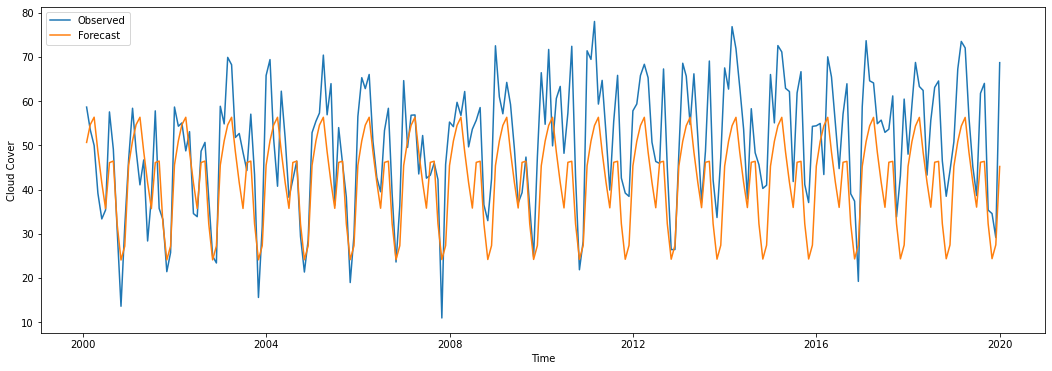

In [46]:
pff_new(result,1,'CLOUD COVER')

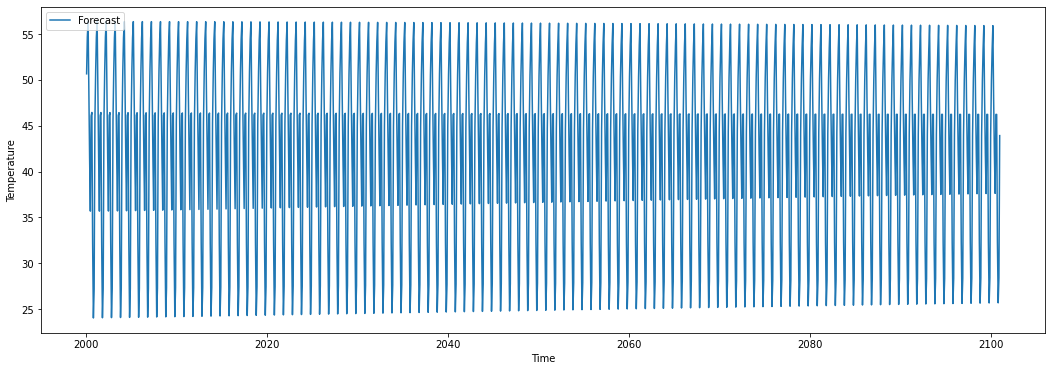

In [61]:
pff_future(result,1,'CLOUD COVER')

In [47]:
rmse(result,'CLOUD COVER',False)
#rmse(result2,'CLOUD COVER',True)

11.89181817982426

In [56]:
r2_score(test['CLOUD COVER'],result.forecast(point))

0.248250624625311

In [62]:
future.to_csv('./future.csv')

In [27]:
sarmodel = sm.tsa.statespace.SARIMAX(train['log'],order=(1,1,3),seasonal_order=(4,1,3,12),
                                   enforce_stationarity=False,enforce_invertibility=False)
sarresult=sarmodel.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


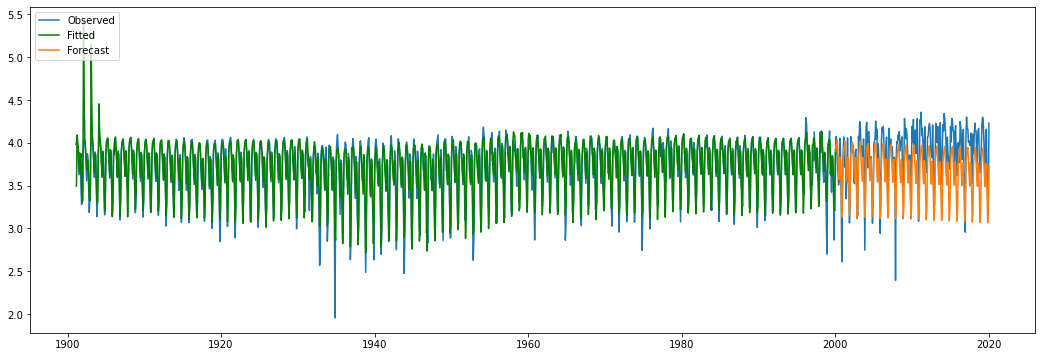

In [18]:
pff(sarresult,1,'log')

In [19]:
rmse(sarresult,'CLOUD COVER',True)

13.855241850865411

In [235]:
sarmodel = sm.tsa.statespace.SARIMAX(train['AVG MAX TEMPERATURE'],order=(4,1,3),seasonal_order=(12,1,3,12),
                                   enforce_stationarity=False,enforce_invertibility=False)
sarresult_max=sarmodel.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1.212599269763597

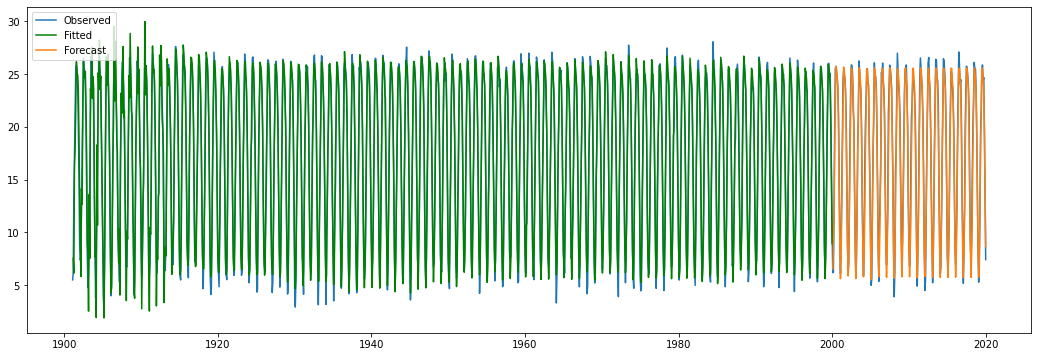

In [236]:
pff(sarresult_max,1,'AVG MAX TEMPERATURE')
rmse(sarresult_max,'AVG MAX TEMPERATURE',False)